In [171]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai import *

In [ ]:
load previous models/dataset

In [62]:
with open('annotations.pkl','rb') as annotations_file:
    annotations = pickle.load(annotations_file)
labels_dict = dict(annotations)
func = lambda x: labels_dict[str(x)]

In [150]:
data= (ImageList.from_folder('slices_64_sample') #Where to find the data? -> in path and its subfolders
        .split_by_rand_pct(0.2)
        .label_from_func(func)
        .transform(size=256)       #Data augmentation? -> use tfms with a size of 64
        .databunch())     

In [64]:
learn = load_learner('slices_64_sample')

In [65]:
learn.data = data

In [37]:
#preds,y = learn.get_preds(ds_type=DatasetType.Test)


In [56]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [66]:
class SaveFeatures():
    features=None
    def __init__(self, m): 
        self.hook = m.register_forward_hook(self.hook_fn)
        self.features = None
    def hook_fn(self, module, input, output): 
        out = output.detach().cpu().numpy()
        if isinstance(self.features, type(None)):
            self.features = out
        else:
            self.features = np.row_stack((self.features, out))
    def remove(self): 
        self.hook.remove()

In [67]:
learn.model[1][4]

Linear(in_features=1024, out_features=512, bias=True)

In [68]:
sf = SaveFeatures(learn.model[1][4])

In [69]:
_= learn.get_preds(data.train_ds)
_= learn.get_preds(DatasetType.Valid)

In [70]:
len(sf.features)

200

In [72]:
img_path = [str(x) for x in (list(data.train_ds.items) +list(data.valid_ds.items))]
label = [data.classes[x] for x in (list(data.train_ds.y.items) +list(data.valid_ds.y.items))]
label_id = [x for x in (list(data.train_ds.y.items) +list(data.valid_ds.y.items))]


In [73]:
len(img_path), len(label), len(label_id)


(200, 200, 200)

In [74]:
df_new = pd.DataFrame({'img_path': img_path, 'label': label, 'label_id': label_id})
df_new

,img_path,label,label_id
0,slices_64_sample/101200791.27_03_04.jpg,building,0
1,slices_64_sample/101200785.27_03_02.jpg,no_building,1
2,slices_64_sample/101200749.27_04_06.jpg,no_building,1
3,slices_64_sample/101200797.27_01_06.jpg,building,0
4,slices_64_sample/101200770.27_05_04.jpg,building,0
5,slices_64_sample/101200776.27_07_06.jpg,building,0
6,slices_64_sample/101200755.27_07_05.jpg,no_building,1
7,slices_64_sample/101200782.27_03_02.jpg,building,0
8,slices_64_sample/101200788.27_05_04.jpg,no_building,1
9,slices_64_sample/101200794.27_06_07.jpg,building,0


In [75]:
array = np.array(sf.features)

In [76]:
x=array.tolist()

In [77]:
df_new['img_repr'] = x

In [78]:
df_new.head()

,img_path,label,label_id,img_repr
0,slices_64_sample/101200791.27_03_04.jpg,building,0,"[0.0, 0.0, 3.593524217605591, 0.0, 0.936373114..."
1,slices_64_sample/101200785.27_03_02.jpg,no_building,1,"[0.7550167441368103, 0.0, 0.0, 0.0, 2.00498628..."
2,slices_64_sample/101200749.27_04_06.jpg,no_building,1,"[0.4502411484718323, 0.4405870735645294, 0.0, ..."
3,slices_64_sample/101200797.27_01_06.jpg,building,0,"[0.0, 0.0, 2.4180350303649902, 0.2061687111854..."
4,slices_64_sample/101200770.27_05_04.jpg,building,0,"[0.0, 0.0, 0.5252935886383057, 0.0, 0.0, 0.0, ..."


In [80]:
from annoy import AnnoyIndex

In [84]:
f = len(df_new['img_repr'][0])
t = AnnoyIndex(f, metric='euclidean')

In [89]:
f # this is the length of the vector representing each image in the last layer of our model 

512

In [141]:
ntree = 200

for i, vector in enumerate(df_new['img_repr']):
    t.add_item(i, vector)
_  = t.build(ntree)

In [142]:
import time
def get_similar_images_annoy(img_index):
    start = time.time()
    base_img_id, base_vector, base_label  = df_new.iloc[img_index, [0, 3, 1]]
    similar_img_ids = t.get_nns_by_item(img_index, 15)
    end = time.time()
    print(f'{(end - start) * 1000} ms')
    return base_img_id, base_label, df_new.iloc[similar_img_ids]

In [143]:
base_image, base_label, similar_images_df = get_similar_images_annoy(1)

0.5471706390380859 ms


no_building


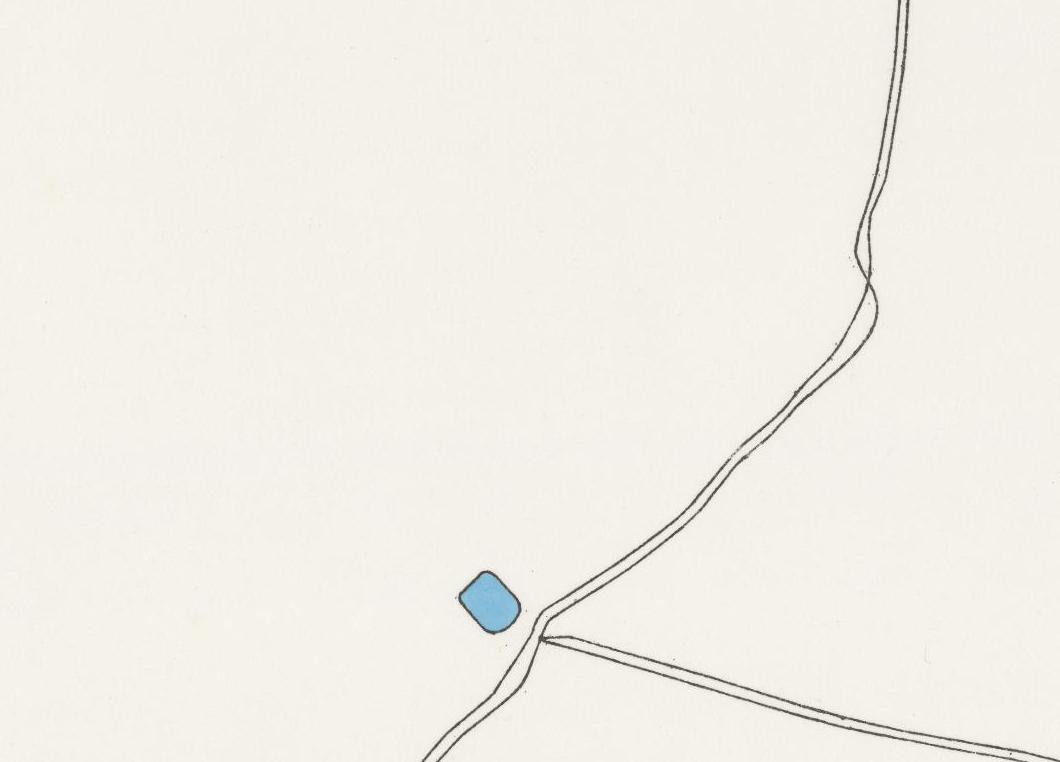

In [144]:
print(base_label)
open_image(base_image)

In [145]:
similar_images_df

,img_path,label,label_id,img_repr
1,slices_64_sample/101200785.27_03_02.jpg,no_building,1,"[0.7550167441368103, 0.0, 0.0, 0.0, 2.00498628..."
47,slices_64_sample/101200746.27_07_02.jpg,no_building,1,"[0.6388384103775024, 0.0, 0.0, 0.0, 2.24841737..."
59,slices_64_sample/101200749.27_04_07.jpg,no_building,1,"[0.0, 0.3558838963508606, 0.0, 0.0, 3.00994682..."
25,slices_64_sample/101200761.27_02_04.jpg,no_building,1,"[0.0, 0.0, 0.0, 0.2035655975341797, 2.67656850..."
53,slices_64_sample/101200755.27_07_04.jpg,no_building,1,"[1.4451930522918701, 2.003297805786133, 0.2318..."
14,slices_64_sample/101200746.27_07_03.jpg,no_building,1,"[0.2657909393310547, 0.0, 0.0, 0.0, 1.73085272..."
58,slices_64_sample/101200770.27_05_05.jpg,no_building,1,"[0.0, 0.0, 0.0, 0.0, 0.849685549736023, 0.0, 1..."
31,slices_64_sample/101200770.27_07_01.jpg,no_building,1,"[0.7625525593757629, 0.9221801161766052, 0.0, ..."
2,slices_64_sample/101200749.27_04_06.jpg,no_building,1,"[0.4502411484718323, 0.4405870735645294, 0.0, ..."
13,slices_64_sample/101200740.27_05_01.jpg,no_building,1,"[0.7801427841186523, 2.1971609592437744, 0.0, ..."


In [146]:
def show_similar_images(similar_images_df):
    images = [open_image(img_id) for img_id in similar_images_df['img_path']]
    categories = [learn.data.train_ds.y.reconstruct(y) for y in similar_images_df['label_id']]
    return learn.data.show_xys(images, categories)


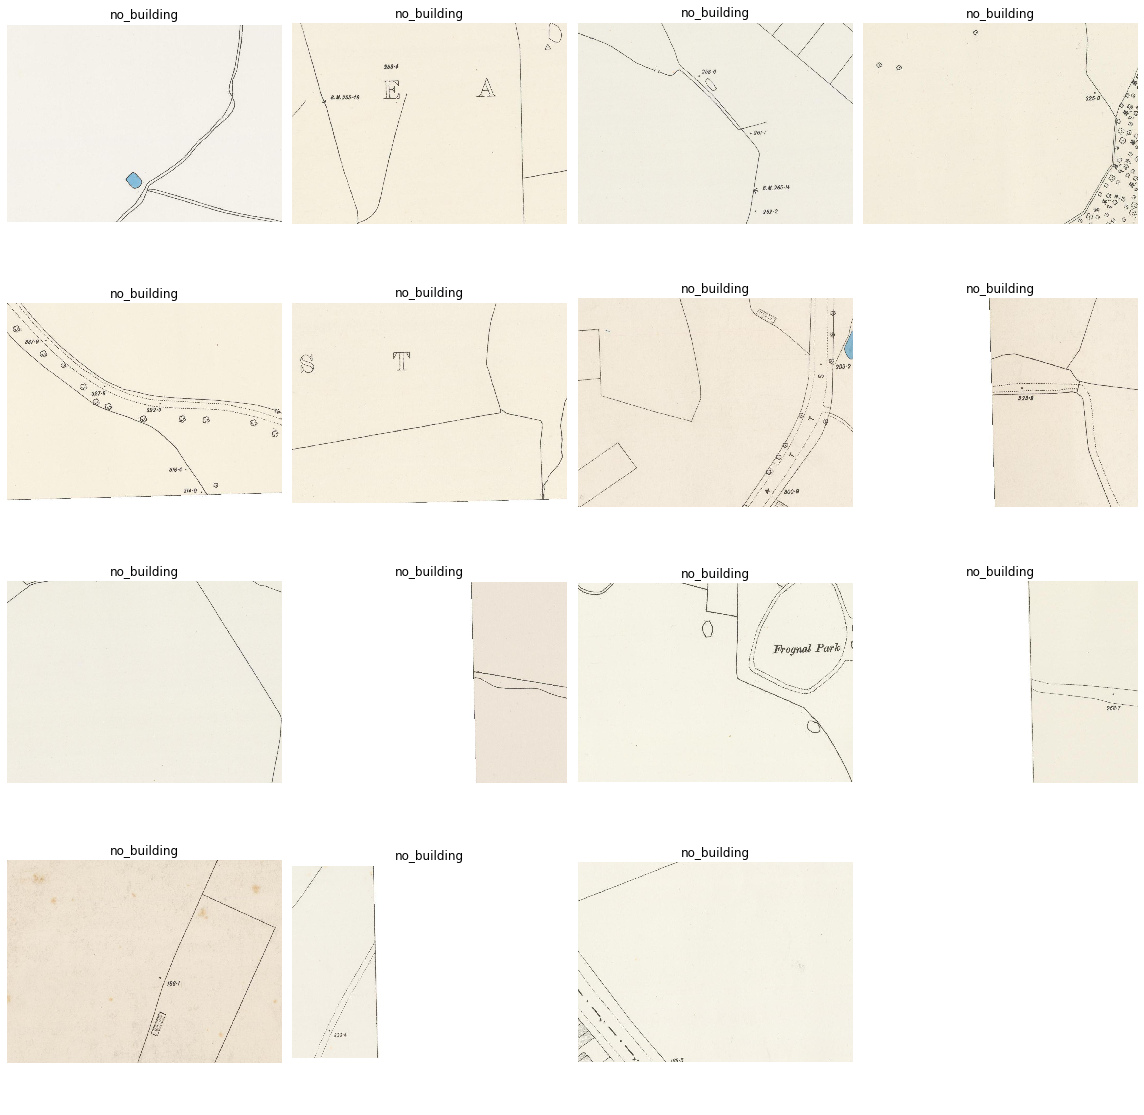

In [147]:
show_similar_images(similar_images_df)

In [165]:
from sklearn.manifold import TSNE

img_repr_matrix = [list(x) for x in df_new['img_repr'].values]
tsne = TSNE(n_components=2, verbose=10, init='pca', perplexity=30, n_iter=500, n_iter_without_progress=100)
tsne_results_2 = tsne.fit_transform(img_repr_matrix)


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 200 samples in 0.001s...
[t-SNE] Computed neighbors for 200 samples in 0.030s...
[t-SNE] Computed conditional probabilities for sample 200 / 200
[t-SNE] Mean sigma: 9.008737
[t-SNE] Computed conditional probabilities in 0.006s
[t-SNE] Iteration 50: error = 54.5059128, gradient norm = 0.5536293 (50 iterations in 0.036s)
[t-SNE] Iteration 100: error = 56.5396805, gradient norm = 0.4887663 (50 iterations in 0.039s)
[t-SNE] Iteration 150: error = 53.6407585, gradient norm = 0.5209998 (50 iterations in 0.036s)
[t-SNE] Iteration 200: error = 56.6859627, gradient norm = 0.5323019 (50 iterations in 0.035s)
[t-SNE] Iteration 250: error = 59.2881775, gradient norm = 0.4825186 (50 iterations in 0.041s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.288177
[t-SNE] Iteration 300: error = 0.3870980, gradient norm = 0.0075012 (50 iterations in 0.034s)
[t-SNE] Iteration 350: error = 0.4034130, gradient norm = 0.0040446 (

In [167]:
df_new['tsne1'] = tsne_results_2[:,0]
df_new['tsne2'] = tsne_results_2[:,1]

In [168]:
df_new.to_parquet('similar_images')


/usr/local/anaconda3/envs/maps/lib/python3.7/site-packages/pyarrow/pandas_compat.py:114: FutureWarning:

A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.



In [172]:
import plotly.express as px
px.scatter_3d(df_new, x='tsne1', y='tsne2', color='label')

In [173]:
img = open_image('slices_64/101200797.27_08_07.jpg')

In [174]:
preds, _, _ = learn.predict(img)

In [179]:
sf.features[:-1]

array([[ 0.      ,  0.      ,  3.593524,  0.      , ...,  0.120306,  0.474947,  0.      ,  2.518044],
       [ 0.755017,  0.      ,  0.      ,  0.      , ...,  1.619131,  0.      ,  0.      ,  0.      ],
       [ 0.450241,  0.440587,  0.      ,  0.184243, ...,  3.68978 ,  0.941428,  0.219939,  0.      ],
       [ 0.      ,  0.      ,  2.418035,  0.206169, ...,  0.      ,  0.      ,  0.      ,  1.135295],
       ...,
       [ 0.884618,  1.192854, -3.158679, -0.807989, ...,  5.347394,  3.043321, -1.518288, -4.585959],
       [ 0.376964, -0.335919, -2.999492, -1.291696, ...,  4.658499,  3.345899, -1.16624 , -3.917107],
       [-3.594229, -0.726119,  4.732914, -1.739646, ..., -0.909428, -0.924223, -1.505356,  3.996635],
       [ 1.945466, -1.060736, -3.410856,  1.576281, ...,  3.934921,  1.622383, -0.558674, -1.505929]], dtype=float32)

In [181]:
learn = load_learner('slices_64_sample', test=ImageList.from_folder('slices_64'))

In [184]:
_= learn.get_preds(ds_type=DatasetType.Test)

In [187]:
len(sf.features)

201